In [1]:
#!pip install graphviz


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

import os

# plots
import matplotlib.pyplot as plt
%matplotlib inline

# para calculas métricas del modelo
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing

# transformers
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder, MinMaxScaler

# pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# model selection e hiperparameters optimization
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, RepeatedKFold, KFold
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.tree import export_graphviz
import graphviz


from sklearn.metrics import accuracy_score

In [3]:
#!pip install scikit-learn==1.2

In [4]:
#from google.colab import drive
#drive.mount('/content/drive')

In [5]:
#df = pd.read("df_easy.csv")  #para usarlo en drive

In [6]:
#PC DE FRANCESC
DATA_PATH = 'C://Users//Usuario//OneDrive//Workplace//Portfolio_Projects//TFM_DSC_Easy_Money//data//'

In [7]:
df = pd.read_csv(os.path.join(DATA_PATH, "df_completo_partitionv2.csv"))

C:\Users\Usuario\AppData\Local\Temp\ipykernel_20824\1440277859.py:1: DtypeWarning: Columns (31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(DATA_PATH, "df_completo_partitionv2.csv"))


In [8]:
# df = pd.read_csv("df_easy.csv") #para usarlo en jupyter

In [9]:
df.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
pk_cid,1375586,1050611,1050612,1050613,1050614,1050615,1050616,1050617,1050619,1050620,1050621,1050622,1050623,1050624,1050625,1050626,1050610,1050627,1050609,1050605
pk_partition,2018-01-01,2018-01-01,2018-01-01,2018-01-01,2018-01-01,2018-01-01,2018-01-01,2018-01-01,2018-01-01,2018-01-01,2018-01-01,2018-01-01,2018-01-01,2018-01-01,2018-01-01,2018-01-01,2018-01-01,2018-01-01,2018-01-01,2018-01-01
short_term_deposit,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
loans,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
mortgage,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
funds,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
securities,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
long_term_deposit,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
em_account_pp,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6001003 entries, 0 to 6001002
Data columns (total 33 columns):
 #   Column              Dtype  
---  ------              -----  
 0   unnamed: 0          int64  
 1   pk_cid              int64  
 2   pk_partition        object 
 3   short_term_deposit  int64  
 4   loans               int64  
 5   mortgage            int64  
 6   funds               int64  
 7   securities          int64  
 8   long_term_deposit   int64  
 9   em_account_pp       int64  
 10  credit_card         int64  
 11  payroll             float64
 12  pension_plan        float64
 13  payroll_account     int64  
 14  emc_account         int64  
 15  debit_card          int64  
 16  em_account_p        int64  
 17  em_acount           int64  
 18  country_id          object 
 19  region_code         float64
 20  gender              object 
 21  age                 int64  
 22  deceased            float64
 23  salary              float64
 24  entry_date          obje

In [11]:
df.isnull().sum()

unnamed: 0                  0
pk_cid                      0
pk_partition                0
short_term_deposit          0
loans                       0
mortgage                    0
funds                       0
securities                  0
long_term_deposit           0
em_account_pp               0
credit_card                 0
payroll                     0
pension_plan                0
payroll_account             0
emc_account                 0
debit_card                  0
em_account_p                0
em_acount                   0
country_id                  0
region_code                 0
gender                      0
age                         0
deceased                    0
salary                      0
entry_date                  0
entry_channel               0
active_customer             0
segment                     0
pk_sale               5760230
pk_product_id         5760230
net_margin            5760230
product_desc          5760230
family_product        5760230
dtype: int

In [12]:
df = df.fillna(0)

In [13]:
df.head().T

,0,1,2,3,4
unnamed: 0,0,1,2,3,4
pk_cid,1375586,1050611,1050612,1050613,1050614
pk_partition,2018-01-01,2018-01-01,2018-01-01,2018-01-01,2018-01-01
short_term_deposit,0,0,0,1,0
loans,0,0,0,0,0
mortgage,0,0,0,0,0
funds,0,0,0,0,0
securities,0,0,0,0,0
long_term_deposit,0,0,0,0,0
em_account_pp,0,0,0,0,0


In [14]:
df.groupby('segment')['product_desc'].value_counts()

segment             product_desc      
01 - TOP            0                       89223
                    emc_account              3281
                    em_acount                2020
                    long_term_deposit        1232
                    short_term_deposit       1091
                    debit_card               1037
                    credit_card               325
                    payroll_account           314
                    pension_plan              270
                    payroll                   243
                    funds                     181
                    securities                115
                    mortgage                    1
02 - PARTICULARES   0                     1771981
                    em_acount               49391
                    debit_card              24429
                    pension_plan            12098
                    payroll                 11586
                    payroll_account         11529
           

In [15]:
#En otros notebooks hemos analizado que hay 5 productos más vendidos:
#Pension plan y Payroll (estos dos con ingresos muy precidos),
#Payroll_account: en tercer lugar entre los dos primeros y el cuarto.
#em_acount y debit_card

#Comenzamos a analizar pension plan para crear un modelo que prediga su propension a compra

#Averiguar cuantos clientes de cada segmento no tiene (0) y tiene (1) contratado un plan de pensiones
df.groupby('segment')['pension_plan'].value_counts()

segment             pension_plan
01 - TOP            0.0               91491
                    1.0                7842
02 - PARTICULARES   0.0             1733389
                    1.0              166958
03 - UNIVERSITARIO  0.0             3925890
                    1.0               75433
Name: count, dtype: int64

In [16]:
#el total de clientes que tienen un plan de pensiones es:
df[df['pension_plan'] == 1].groupby('segment')['pension_plan'].sum()


segment
01 - TOP                7842.0
02 - PARTICULARES     166958.0
03 - UNIVERSITARIO     75433.0
Name: pension_plan, dtype: float64

In [17]:
7842+166958+75433

250233

In [18]:
#el total de clientes que NO tienen un plan de pensiones es:
df[df['pension_plan'] == 0].groupby('segment')['pension_plan'].value_counts()

segment             pension_plan
01 - TOP            0.0               91491
02 - PARTICULARES   0.0             1733389
03 - UNIVERSITARIO  0.0             3925890
Name: count, dtype: int64

In [19]:
91491+1733389+3925890

5750770

In [20]:
#Vamos a crear un modelo para predecir la propensión de compra de los clientes del plan de pensiones, que se ha
#analizado es uno de los productos con mayor nivel de ingresos.
#Por lo tanto, el target es si el producto plan de pensiones se contrata (1) o no (0)

In [21]:
#Tenemos un dataset de más de 5.750.770 filas, por lo tanto, una proporción de 0,1 de éxito del target respecto al resto
#de filas, es aceptable . En realidad, nuestra proporción es del 18% de éxitos (clientes que compran plan de pensiones)
250233/(5750770+250233)
#Esta proporción la explica Guillem en su clase de repaso, minuto 23:00. Tenemos más de 2000 filas de la clase minoritaria

0.041698529395835994

In [22]:
#Por lo tanto, en principio no habria que hacer over o undersamplig
#Otra forma de analizarlo es viendo la matriz de confusión (26:00). Si el modelo predice pocas veces la clase minoritaria
#esto es señal de que el dataset está desbalanceado.

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6001003 entries, 0 to 6001002
Data columns (total 33 columns):
 #   Column              Dtype  
---  ------              -----  
 0   unnamed: 0          int64  
 1   pk_cid              int64  
 2   pk_partition        object 
 3   short_term_deposit  int64  
 4   loans               int64  
 5   mortgage            int64  
 6   funds               int64  
 7   securities          int64  
 8   long_term_deposit   int64  
 9   em_account_pp       int64  
 10  credit_card         int64  
 11  payroll             float64
 12  pension_plan        float64
 13  payroll_account     int64  
 14  emc_account         int64  
 15  debit_card          int64  
 16  em_account_p        int64  
 17  em_acount           int64  
 18  country_id          object 
 19  region_code         float64
 20  gender              object 
 21  age                 int64  
 22  deceased            float64
 23  salary              float64
 24  entry_date          obje

In [24]:
df.describe()

,unnamed: 0,pk_cid,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,...,em_account_p,em_acount,region_code,age,deceased,salary,active_customer,pk_sale,pk_product_id,net_margin
count,6.001003e+06,6.001003e+06,6.001003e+06,6.001003e+06,6.001003e+06,6.001003e+06,6.001003e+06,6.001003e+06,6001003.0,6.001003e+06,...,6.001003e+06,6.001003e+06,6.001003e+06,6.001003e+06,6.001003e+06,6.001003e+06,6.001003e+06,6.001003e+06,6.001003e+06,6.001003e+06
mean,7.151642e+06,1.235452e+06,2.815696e-03,7.915343e-05,5.665720e-05,3.417095e-03,3.765204e-03,1.704682e-02,0.0,1.206632e-02,...,5.998997e-06,7.321821e-01,2.580806e+01,2.979857e+01,1.793034e-04,1.116023e+05,4.070445e-01,5.097596e+03,1.582982e+02,2.434924e+01
std,3.920196e+06,1.625592e+05,5.298838e-02,8.896470e-03,7.526885e-03,5.835597e-02,6.124563e-02,1.294458e-01,0.0,1.091821e-01,...,2.449278e-03,4.428222e-01,1.359844e+01,1.198815e+01,1.338922e-02,1.867685e+05,4.912833e-01,2.855702e+04,8.405130e+02,3.675222e+02
min,0.000000e+00,1.589100e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.238286e+06,1.112901e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,...,0.000000e+00,0.000000e+00,1.300000e+01,2.200000e+01,0.000000e+00,6.013470e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,7.496690e+06,1.231893e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,...,0.000000e+00,1.000000e+00,2.800000e+01,2.500000e+01,0.000000e+00,8.688771e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.019914e+07,1.353149e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,...,0.000000e+00,1.000000e+00,3.600000e+01,3.400000e+01,0.000000e+00,1.274022e+05,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.364731e+07,1.553689e+06,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.0,1.000000e+00,...,1.000000e+00,1.000000e+00,5.200000e+01,1.050000e+02,1.000000e+00,2.889440e+07,1.000000e+00,2.474380e+05,9.001000e+03,1.846640e+04


In [25]:
#variables con mayor desviacion standard (relativa) me ayudan a predecir el target

In [26]:
#Observo las ventas en qué mes empiezan y en qué mes acaban

In [27]:
df.groupby('pk_partition')['pk_sale'].value_counts()

pk_partition  pk_sale 
2018-01-01    0.0         239493
2018-02-01    0.0         230529
              107648.0         1
              107565.0         1
              107568.0         1
                           ...  
2019-05-01    21751.0          1
              21762.0          1
              21785.0          1
              21802.0          1
              247438.0         1
Name: count, Length: 240790, dtype: int64

In [28]:
#añado nuevas variables al dataset que describan mejor los meses, años. (56:00)

In [29]:
#convierto la variable month_sale en fecha

#df['date_time'] = pd.to_datetime(df['month_sale'], format='%Y%m%d')
df['date_time'] = pd.to_datetime(df['pk_partition'], format='%Y-%m-%d')



In [30]:
df['year']=df['date_time'].dt.year
df['month']=df['date_time'].dt.month  #solo transformamos a año y mes poruqe todas las ventas aparecen en el dia 1 del mes
#df['day']=df['date_time'].dt.day
#df['weekDay']=df['date_time'].dt.weekday
#df['quarter']=df['date_time'].dt.quarter
#df['week']=df['date_time'].dt.week

In [31]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
unnamed: 0,0,1,2,3,4,5,6,7,8,9
pk_cid,1375586,1050611,1050612,1050613,1050614,1050615,1050616,1050617,1050619,1050620
pk_partition,2018-01-01,2018-01-01,2018-01-01,2018-01-01,2018-01-01,2018-01-01,2018-01-01,2018-01-01,2018-01-01,2018-01-01
short_term_deposit,0,0,0,1,0,0,0,0,0,0
loans,0,0,0,0,0,0,0,0,0,0
mortgage,0,0,0,0,0,0,0,0,0,0
funds,0,0,0,0,0,0,0,0,0,0
securities,0,0,0,0,0,0,0,0,0,0
long_term_deposit,0,0,0,0,0,0,0,0,0,0
em_account_pp,0,0,0,0,0,0,0,0,0,0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6001003 entries, 0 to 6001002
Data columns (total 36 columns):
 #   Column              Dtype         
---  ------              -----         
 0   unnamed: 0          int64         
 1   pk_cid              int64         
 2   pk_partition        object        
 3   short_term_deposit  int64         
 4   loans               int64         
 5   mortgage            int64         
 6   funds               int64         
 7   securities          int64         
 8   long_term_deposit   int64         
 9   em_account_pp       int64         
 10  credit_card         int64         
 11  payroll             float64       
 12  pension_plan        float64       
 13  payroll_account     int64         
 14  emc_account         int64         
 15  debit_card          int64         
 16  em_account_p        int64         
 17  em_acount           int64         
 18  country_id          object        
 19  region_code         float64       
 20  ge

In [33]:
#ANALIZAMOS LAS VARIABLES que vamos a introducir al modelo y las que se eliminan

In [34]:
#VARIABLES A ELIMINAR

#pk_sale: se elimina, no  da informacion adicional
#pk_cid: se elimina, no  da informacion adicional
#month_sale: se elimina, pues ya he introducido nuevas variables más representativas de fechas.
#pk_product_ID: se elimina, es autoexplicativa con product_desc
#product_desc: es autoexplicativa con todos los productos que son variables en si.
#family_product: se elimina porque es autoexplicativa con product_desc
#entry_date: no aporta información al modelo para propension de compra.
#country_id: practicamente todos los clientes son del mismo pais.
#deceased: se elimina por razones obvias
#date_time: se elimina porque ya hemos creado variables mejores de fecha.


In [35]:
#VARIABLES A USAR y transformado

#net_margin: se utliza, es el margen del producto. A las numericas en un arbol de decisión no se les hace escaladao
#entry_channel: se utiliza porque aporta informacion de por qué canal compra el cliente. Le hacemos un OHE.
#active_customer: se usa pues describe como de activo es el cliente usando la aplicación de la empresa. No se transforma
#segment: se utiliza pues describe en qué segmento se agrupa el cliente. Se hace un OHE
#region_code: describe de qué región proviene el cliente. Es numerica pero funciona como categórica, se pasa a categorica
#y se le hace un OHE.

#gender: se usa, se le hace un OHE
#age: se usa, no se le hace nada
#salary: se usa, no se le hace nada

#Todos los productos se dejan igual, OJO, a payroll y pension plan hay que cambiarlo a entero, esta como decimal.
#year, month, day, weekday, quarter y week se utilizan: se les hace un escalado.


In [36]:
#cambiamos el tipo de dato a algunas variables:
df['region_code'] = df['region_code'].astype('category')
df[['payroll','pension_plan']] = df[['payroll','pension_plan']].astype('int')



In [37]:
df.columns

Index(['unnamed: 0', 'pk_cid', 'pk_partition', 'short_term_deposit', 'loans',
       'mortgage', 'funds', 'securities', 'long_term_deposit', 'em_account_pp',
       'credit_card', 'payroll', 'pension_plan', 'payroll_account',
       'emc_account', 'debit_card', 'em_account_p', 'em_acount', 'country_id',
       'region_code', 'gender', 'age', 'deceased', 'salary', 'entry_date',
       'entry_channel', 'active_customer', 'segment', 'pk_sale',
       'pk_product_id', 'net_margin', 'product_desc', 'family_product',
       'date_time', 'year', 'month'],
      dtype='object')

In [38]:
#seleccionamos la variables a eliminar y transformar
variables_eliminar=['pk_sale','pk_cid','pk_partition','product_desc','family_product','pk_product_id',
                    'entry_date','country_id','deceased','date_time']

variables_OHE=['entry_channel','segment','region_code','gender']

In [39]:
df_prep = df.drop(variables_eliminar,axis=1)



In [40]:
df_prep

,unnamed: 0,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,...,region_code,gender,age,salary,entry_channel,active_customer,segment,net_margin,year,month
0,0,0,0,0,0,0,0,0,0,0,...,29.0,H,35,87218.10,KHL,1.0,02 - PARTICULARES,0.0,2018,1
1,1,0,0,0,0,0,0,0,0,0,...,13.0,V,23,35548.74,KHE,0.0,03 - UNIVERSITARIO,0.0,2018,1
2,2,0,0,0,0,0,0,0,0,0,...,13.0,V,23,122179.11,KHE,0.0,03 - UNIVERSITARIO,0.0,2018,1
3,3,1,0,0,0,0,0,0,0,0,...,50.0,H,22,119775.54,KHD,0.0,03 - UNIVERSITARIO,0.0,2018,1
4,4,0,0,0,0,0,0,0,0,0,...,50.0,V,23,148677.18,KHE,1.0,03 - UNIVERSITARIO,0.0,2018,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6000998,13647304,0,0,0,0,0,0,0,0,0,...,50.0,V,22,43912.17,KHE,0.0,03 - UNIVERSITARIO,0.0,2019,5
6000999,13647305,0,0,0,0,0,0,0,0,0,...,26.0,V,23,23334.99,KHE,0.0,03 - UNIVERSITARIO,0.0,2019,5
6001000,13647306,0,0,0,0,0,0,0,0,0,...,50.0,H,47,48393.42,KHE,1.0,02 - PARTICULARES,0.0,2019,5
6001001,13647307,0,0,0,0,0,0,0,0,0,...,50.0,H,22,199592.82,KHE,0.0,03 - UNIVERSITARIO,0.0,2019,5


In [41]:
df_prep.isnull().sum()

unnamed: 0            0
short_term_deposit    0
loans                 0
mortgage              0
funds                 0
securities            0
long_term_deposit     0
em_account_pp         0
credit_card           0
payroll               0
pension_plan          0
payroll_account       0
emc_account           0
debit_card            0
em_account_p          0
em_acount             0
region_code           0
gender                0
age                   0
salary                0
entry_channel         0
active_customer       0
segment               0
net_margin            0
year                  0
month                 0
dtype: int64

In [42]:
#Ahora se hace el OHE a las columnas seleccionadas, vamos a crear una función para ello

In [43]:
# Definir la función de One Hot Encoding
def one_hot_encode(df, columns):
    df_encoded = pd.get_dummies(df, columns=columns)
    return df_encoded

# Lista de columnas para codificar las hemos definido antes
#variables_OHE=['product_desc','entry_channel','segment','region_code','gender']

# Realizar la codificación one-hot en df2
df_prep = one_hot_encode(df_prep, variables_OHE)

In [44]:
df_prep.head()

,unnamed: 0,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,...,region_code_45.0,region_code_46.0,region_code_47.0,region_code_48.0,region_code_49.0,region_code_50.0,region_code_51.0,region_code_52.0,gender_H,gender_V
0,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
1,1,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,True
2,2,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,True
3,3,1,0,0,0,0,0,0,0,0,...,False,False,False,False,False,True,False,False,True,False
4,4,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,True,False,False,False,True


In [45]:
df_prep.drop(columns=['unnamed: 0'], inplace=True)

In [46]:
#se va a eliminar las columnas de fecha pero antes, vamos a elegir la parte de development (train+test) y validación
# ya que algunas columnas son de fecha y las necesitamos como están para poder elegir los meses que queremos.

In [47]:
#Observamos las ventas de pension plan a lo largo de los meses
df.groupby(['year','month'])['pension_plan'].sum()

year  month
2018  1         8835
      2        12203
      3        11678
      4        12207
      5        11680
      6        13500
      7        15364
      8        14075
      9        14189
      10       15315
      11       16163
      12       17982
2019  1        14145
      2        17233
      3        18060
      4        18164
      5        19440
Name: pension_plan, dtype: int32

In [48]:
#Se elige los meses de 12-2018 y 01-2019 para validación, pues es una buena representación tanto de éxito de ventas como
#de caída en las ventas.

#EL resto de meses se usarán para development (train + test)

In [49]:
# Filtrar los datos de validación: diciembre 2018 y enero 2019
df_val_1 = df_prep[((df_prep['year'] == 2018) & (df['month'] == 12)) | ((df['year'] == 2019) & (df['month'] == 1))]

In [50]:
# Filtrar los datos para development (train + test), el resto de meses
df_dev_1 = df_prep[~(((df_prep['year'] == 2018) & (df_prep['month'] == 12)) | ((df_prep['year'] == 2019) & (df['month'] == 1)))]

In [51]:
df_val_1

,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,...,region_code_45.0,region_code_46.0,region_code_47.0,region_code_48.0,region_code_49.0,region_code_50.0,region_code_51.0,region_code_52.0,gender_H,gender_V
3387135,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,True
3387136,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,True
3387137,0,0,0,0,0,0,0,0,0,0,...,False,True,False,False,False,False,False,False,False,True
3387138,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
3387139,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4241364,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
4241365,0,0,0,0,0,0,0,0,0,0,...,False,False,True,False,False,False,False,False,True,False
4241366,0,0,0,0,0,0,0,0,0,0,...,False,False,True,False,False,False,False,False,False,True
4241367,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False


In [52]:
df_dev_1.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 5146769 entries, 0 to 6001002
Data columns (total 147 columns):
 #    Column                      Dtype  
---   ------                      -----  
 0    short_term_deposit          int64  
 1    loans                       int64  
 2    mortgage                    int64  
 3    funds                       int64  
 4    securities                  int64  
 5    long_term_deposit           int64  
 6    em_account_pp               int64  
 7    credit_card                 int64  
 8    payroll                     int32  
 9    pension_plan                int32  
 10   payroll_account             int64  
 11   emc_account                 int64  
 12   debit_card                  int64  
 13   em_account_p                int64  
 14   em_acount                   int64  
 15   age                         int64  
 16   salary                      float64
 17   active_customer             float64
 18   net_margin                  float64
 19   yea

In [53]:
#Ahora elimino las columnas de fechas tanto en df_val_1 como en df_dev_1
df_val_1=df_val_1.drop(['year','month'], axis=1)
df_dev_1=df_dev_1.drop(['year','month'], axis=1)
                 

In [54]:
df_val_1.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 854234 entries, 3387135 to 4241368
Data columns (total 145 columns):
 #    Column                      Dtype  
---   ------                      -----  
 0    short_term_deposit          int64  
 1    loans                       int64  
 2    mortgage                    int64  
 3    funds                       int64  
 4    securities                  int64  
 5    long_term_deposit           int64  
 6    em_account_pp               int64  
 7    credit_card                 int64  
 8    payroll                     int32  
 9    pension_plan                int32  
 10   payroll_account             int64  
 11   emc_account                 int64  
 12   debit_card                  int64  
 13   em_account_p                int64  
 14   em_acount                   int64  
 15   age                         int64  
 16   salary                      float64
 17   active_customer             float64
 18   net_margin                  float64
 19 

In [55]:
df_dev_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5146769 entries, 0 to 6001002
Columns: 145 entries, short_term_deposit to gender_V
dtypes: bool(126), float64(3), int32(2), int64(14)
memory usage: 1.3 GB


In [56]:
df_val_1.head()

,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,...,region_code_45.0,region_code_46.0,region_code_47.0,region_code_48.0,region_code_49.0,region_code_50.0,region_code_51.0,region_code_52.0,gender_H,gender_V
3387135,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,True
3387136,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,True
3387137,0,0,0,0,0,0,0,0,0,0,...,False,True,False,False,False,False,False,False,False,True
3387138,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
3387139,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,True


In [57]:
df_dev_1.head()

,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,...,region_code_45.0,region_code_46.0,region_code_47.0,region_code_48.0,region_code_49.0,region_code_50.0,region_code_51.0,region_code_52.0,gender_H,gender_V
0,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
1,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,True
2,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,True
3,1,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,True,False,False,True,False
4,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,True,False,False,False,True


In [58]:
#Una vez tenemos el dataset preprocesado, vamos a ver qué estrategia de validación vamos a usar.

In [59]:
#57:35

In [60]:
#ESTRATEGIAS DE VALIDACION: recordar siempre que la particion de validacion (para Guillem la validacion es cuando
#comparamos el modelo con la realidad una vez entrenado y testeado) tenemos que cogerla de forma intencionada, no puede
#ser random. Development engloba el train y el test. 1:09:00
#La partición entre train y test debe ser aleatoria, importante. Train 60% y test 20%
#La partición de validación debe ser intencionada. Validación 20%.

#La partición de validación en nuestro caso habría que escogerla teniendo en cuenta si las compras de los productos
#analizados tienen estacionalidad o no. Sabemos que en los ultimos meses de datos las ventas caen muchísimo, quizás esos
#meses habria que descartarlos para validación, pues no representan el comportamiento real de intención de compra. Esa
#caída en las compras no conocemos su causa ni tenemos datos para entender el motivo, es algo que corresponde a negocio
# el que expliquen el motivo de esa caida o que nos proporcionen más datos para analizarlo.

#Una buena estrategia para validacion seria coger un mes de los utimos "malo" y otro mes bueno de ventas.
#Tenemos datos de ventas desde 02-2018 hasta 05-2019. Cogeria para validacion noviembre y diciembre de 2019, el resto
#para development (para que el modelo aprenda tambien cuando las ventas van mal).

#Se usará el Random Holdout para separar la parte de development (train y test) de la parte de validacion, ya que
#tenemos muchos datos.
#Las estrategias de K-fold o bien el bootstrap se usan cuando hay pocos datos, no es nuestro caso.

#IMPORTANTE: cuando tenemos que rebalancear el dataset, solo aplica a train y test, nunca a validacion (la parte que
#tenemos que comparar con la realidad). 1:32:10

#IMPORTANTE: para ver la metrica del accuracy, siempre comparamos el accurraccy que me da en development con el de
#validación, para comparar varios modelos que hayamos probado, nunca comparar la métrica que me sale en development
#entre modelos, siempre se comparan frente a validación.  1:35:00

#El accuraccy no es buena métrica para ver si está bien balanceado el dataset, para ello usaremos la matriz de
#confusión, con ella veremos si tenemos que rebalancear.

#La curva AUC nos dice de manera más objetiva si el modelo es bueno independientemente de si el dataset está bien
#balandeado o no.

#Es normal tener una cierta diferencia entre develp y validacion: 0.72 - 0,71. Pero 0.75 frente 0,65 no está bien.
#Si el accuraccy entre train y test es parecido, eso quiere decir que el modelo no memoriza.

In [61]:
#Ahora se define el target y el resto de datos tanto para development como para validacion
df_dev_1_X = df_dev_1.drop(['pension_plan'],axis=1)
df_dev_1_y = df_dev_1[['pension_plan']]

df_val_1_X = df_val_1.drop(['pension_plan'],axis=1)
df_val_1_y = df_val_1[['pension_plan']]

In [62]:
#Ahora defino la parte de developmente entre train y test: para ello se usará un Random Holdout
X_train, X_test, y_train, y_test = model_selection.train_test_split(
                                        df_dev_1_X,
                                        df_dev_1_y,
                                        test_size = 0.30,
                                        random_state = 42
                                    )

In [63]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3602738 entries, 2839119 to 1692743
Columns: 144 entries, short_term_deposit to gender_V
dtypes: bool(126), float64(3), int32(1), int64(14)
memory usage: 941.4 MB


In [64]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1544031 entries, 448378 to 5739939
Columns: 144 entries, short_term_deposit to gender_V
dtypes: bool(126), float64(3), int32(1), int64(14)
memory usage: 403.5 MB


In [65]:
#Observamos si entre train y test la distribucion sea parecida 1:56:30. Vemos que SI lo es. Si no lo fuera, el accuraccy
#en train podria ser de  0.8 u en test de 0,75, esta diferencia no es porque existiera overfitting, si no porque la
#distribución es distinta en ambas particiones.

#En nuestro caso, vemos que no hay problema.


In [66]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
short_term_deposit,3602738.0,0.003133,0.055882,0.0,0.00,0.00,0.00,1.00
loans,3602738.0,0.000080,0.008941,0.0,0.00,0.00,0.00,1.00
mortgage,3602738.0,0.000058,0.007635,0.0,0.00,0.00,0.00,1.00
funds,3602738.0,0.003454,0.058667,0.0,0.00,0.00,0.00,1.00
securities,3602738.0,0.003782,0.061380,0.0,0.00,0.00,0.00,1.00
long_term_deposit,3602738.0,0.017234,0.130143,0.0,0.00,0.00,0.00,1.00
em_account_pp,3602738.0,0.000000,0.000000,0.0,0.00,0.00,0.00,0.00
credit_card,3602738.0,0.012290,0.110176,0.0,0.00,0.00,0.00,1.00
payroll,3602738.0,0.040150,0.196312,0.0,0.00,0.00,0.00,1.00
payroll_account,3602738.0,0.059779,0.237077,0.0,0.00,0.00,0.00,1.00


In [67]:
X_test.describe().T

,count,mean,std,min,25%,50%,75%,max
short_term_deposit,1544031.0,0.003202,0.056496,0.0,0.00,0.00,0.00,1.00
loans,1544031.0,0.000084,0.009140,0.0,0.00,0.00,0.00,1.00
mortgage,1544031.0,0.000056,0.007506,0.0,0.00,0.00,0.00,1.00
funds,1544031.0,0.003469,0.058800,0.0,0.00,0.00,0.00,1.00
securities,1544031.0,0.003764,0.061237,0.0,0.00,0.00,0.00,1.00
long_term_deposit,1544031.0,0.017180,0.129943,0.0,0.00,0.00,0.00,1.00
em_account_pp,1544031.0,0.000000,0.000000,0.0,0.00,0.00,0.00,0.00
credit_card,1544031.0,0.012289,0.110171,0.0,0.00,0.00,0.00,1.00
payroll,1544031.0,0.040320,0.196710,0.0,0.00,0.00,0.00,1.00
payroll_account,1544031.0,0.059997,0.237481,0.0,0.00,0.00,0.00,1.00


In [68]:
y_train.describe().T

,count,mean,std,min,25%,50%,75%,max
pension_plan,3602738.0,0.042328,0.201337,0.0,0.0,0.0,0.0,1.0


In [69]:
y_test.describe().T

,count,mean,std,min,25%,50%,75%,max
pension_plan,1544031.0,0.042491,0.201707,0.0,0.0,0.0,0.0,1.0


In [70]:
#1:58:00

In [71]:
#Hacer el modelo de arbol de decision.

In [72]:
dt = DecisionTreeClassifier(
                          #criterion='gini',
                          #splitter = 'best'
                          max_depth=4, #importante: numero de preguntas, regulará el sobreajuste
                          #min_samples_split=2,
                          #min_samples_leaf=1,
                          #min_weight_fraction_leaf=0.0,
                          #max_features=None,
                          random_state=42,
                          #max_leaf_nodes=None,
                          #min_impurity_decrease=0.0,
                          #min_impurity_split=None,
                          #class_weight=None,
                          #presort=False,


                 )

In [73]:
#dt.fit?

In [74]:
dt.fit(
    X=X_train,
    y=y_train,
    #sample_weight=None,
    #check_input=True,
    #X_idx_sorted=None
)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [75]:
#Una vez generado el arbol, lo visualizamos con export_graphviz

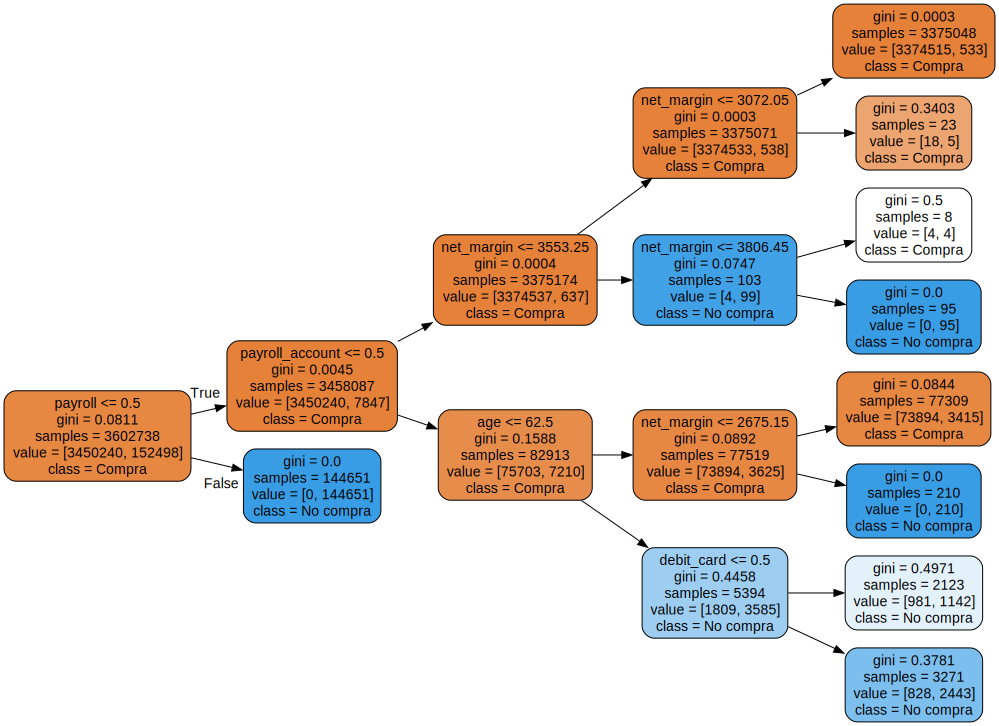

In [76]:
dot_data = export_graphviz(
                          decision_tree = dt,
                          #out_file=None,
                          #max_depth=None,
                          feature_names=X_test.columns,
                          class_names=['Compra','No compra'],
                          #label=all',
                          filled=True,
                          #leaves_parallel=false,
                          impurity=True,
                          #node_ids=False,
                          proportion=False,
                          rotate=True,
                          rounded=True,
                          special_characters=False,
                          precision=4,
                         )
graph = graphviz.Source(dot_data)
graph

In [77]:
#analizar el arbol de decision 2:02:00

In [78]:
#Revisamos el overfitting (entre train y test). Si medimos con el accuracy, no debería haber más de un punto de 
#diferencia.

for i in range(1,20):
    dt=DecisionTreeClassifier(max_depth=i, random_state=42)
    dt.fit(X_train, y_train)
    train_accuracy = dt.score(X_train, y_train)
    test_accuracy = dt.score(X_test, y_test)
    print('Profundidad del árbol: {}. Train: {} - Test: {}'.format(i,train_accuracy,test_accuracy))

Profundidad del árbol: 1. Train: 0.9978219343177328 - Test: 0.9978290591315848
Profundidad del árbol: 2. Train: 0.9978219343177328 - Test: 0.9978290591315848
Profundidad del árbol: 3. Train: 0.9983412615627337 - Test: 0.9983465357884654
Profundidad del árbol: 4. Train: 0.9983995505640433 - Test: 0.9984028818074249
Profundidad del árbol: 5. Train: 0.9984303604647354 - Test: 0.9984287880230384
Profundidad del árbol: 6. Train: 0.9984614479321006 - Test: 0.9984527512724809
Profundidad del árbol: 7. Train: 0.9984739384323812 - Test: 0.9984618184479457
Profundidad del árbol: 8. Train: 0.9984894821660637 - Test: 0.9984734762449717
Profundidad del árbol: 9. Train: 0.998525565833541 - Test: 0.9984903152851206
Profundidad del árbol: 10. Train: 0.9985755278346635 - Test: 0.9985110402576114
Profundidad del árbol: 11. Train: 0.9986429765361788 - Test: 0.9985265839869796
Profundidad del árbol: 12. Train: 0.9987206952045916 - Test: 0.9985971784245264
Profundidad del árbol: 13. Train: 0.99879008687281

In [79]:
#Ahora evaluamos el modelo, puedo hacerlo de varias maneras:

#  ACCURACY: el % de aciertos. Pero hay dos problemas, depende del balanceo del dataset. Si es un datset muy desbalanceado
#  esta métrica no funciona bien. Otro problema es que no se lo que está haciendo el modelo. Por ello, el accuracy hay que
#  usarlo poco

# MATRIZ DE CONFUSION: esto solo sirve para clasificacion. Lo que hace es observar que es lo que ha ocurrido en la realidad
# (0) ó (1) y en la predicción. Si predice que es 1 (compra) y la realidad es 1 (compra), es un TruePositive (TP). Si
# predice que no compra (0) y la realidad es que no compra (0), es un TrueNegative(TN). Todo lo que sea FP y FN son errores
# del modelo.
# Con la matriz de confusión podemos ver qué tipo de error estamos teniendo en el modelo, pero tambien podemos ver si hay
#un problema en el balanceo del dataset 2:07:40

#F1 SCORE: mitiga el problema de los dataset desbalanceados. Con el F1 SCORE podemos comparar dos modelos entre si para saber
#si uno es mejor que el otro. Esto no pasa con el accuracy, si tenemos un accuracy de un 80% en un modelo, no quiere decir
#que sea mejor que otro modelo con el 60% de accuracy-.
#En realidad hace dos metricas: recall y precision
#Recall:del total de positivos que hay en la realidad, cuantos llega a detectar el modelo. Si en la realidad hay 10 casos
#positivos pero el modelo predice 0, el recall = 0.
#Precision: del total de positivos que detecta el modelo ¿cuantos eran positivos en realidad? Una precision baja indica
#que el modelo detecta positivos cuando en realidad no lo son.
#El F1 Score combina ambas métricas, recall y precision, para darnos una media armónica (para que el F1 Score sea alto,
#tanto recall como precision deben ser altos). Para saber donde se esta equivacando el modelo, podemos mirar tanto recall
#como precision. El F1 score varia entre 0 y 1, cuanto mas cerca de 1 mejor.

# AUC:    2:13:50
#Esta es la mejor métrica. Para predecir cuando  algo es 1 o es 0, debo tener un treshold (límite). Si el modelo predice que
#la probabilidad de que compren el producto es del 60%, ¿eso es un 1 o es un 0? , pues dependerá del treshold. La predicción
# 1 ó 0 dependerá de la probabilidad que da el modelo y del treshold que le pongamos al modelo. Lo habitual es ponerlo al
# 50%, pero podría ser distinto.
#Por ello, lo que calcula el AUC son dos metricas, recall y otra más, en función de este treshold. Ve, para diferentes
# opciones de treshold, como funciona la recall y como funciona otra méetrica (FalsePositiveRate, FPR), de esta forma nos
#evitamos depender del treshold.

#¿Como funcionan recall y FPR en funcion del Treshold? es importante saber esto para saber que es el AUC
#recordamos que el recall es que del total de positivos en la realidad, cuantos detecta el modelo. El total de positivos que
#hay en la realidad es siempre el mismo (datos de validacion), pero el total de positivos que predice el modelo depende
#del treshold. Si ponemos un Treshold alto, significa que solo cuando la probabilidad es alta, eso es un 1. Por lo tanto, si
#ponemos un treshold bajo, cuando la probabiliad del modelo sea baja, se alcanza el 1 facilmente. Por lo tanto, la recall será
#alta porque parece que el modelo predice muchos positivos. Por lo tanto, treshold baja equivale a recall alta.
#Pero tambien tenenmos el FPR: del total de ceros que hay (denominador) evalua con lo que el modelo predice como 1 pero que en
#realidad no lo era (FP, en el numerador). Por lo tanto, si el modelo dice que todo es positivo porque el treshold es bajo, voy
#a tener un FPR alto.
#CONCLUSION: con treshold bajo tendremos recall y FPR altos. Con treshold altos, recall y FPR bajos. Recall es algo bueno,
#pero FPR es algo malo, pero los dos se mueven en la misma dirección con el treshold.

#El AUC realiza varias combinaciones del treshold y meterlas en una tabla (eje x el FPR y el eje y la recall). 2:17:40.
#el AUC es todo el area que encierra la curva AUC, como es un area, varia entre 0 y 1. Cuanto mayor sea el AUC mejor, porquee
#quiere decir que tengo recall alta (TPR) sin tener FPR altos

#El AUC es mucho más comparable entre difentes dataset

#2:19:30
#se aconseja comparar development con validacion usando el AUC, porque no le importa la proporcion de 1 y 0 que haya en una
#partición y otra


In [80]:
#OPCION 1: EVALUAMOS A TRAVES DE LOS RESULTADOS

In [81]:
y_test_pred = pd.DataFrame(dt.predict(X_test),index=y_test.index,columns=['prediccion_compra_plan_pensiones'])

In [82]:
y_test_pred.head()

,prediccion_compra_plan_pensiones
448378,0
201816,1
282213,0
4839900,0
694406,0


In [83]:
results_df=y_test.join(y_test_pred)

In [84]:
results_df.head()
#2:22:00

,pension_plan,prediccion_compra_plan_pensiones
448378,0,0
201816,1,1
282213,0,0
4839900,0,0
694406,0,0


In [85]:
#ver porque no se lo que hay que poner en lugar de raintomorrow (del notebook de Guillem)
results_df['Éxito'] = (results_df['pension_plan']) == results_df['prediccion_compra_plan_pensiones'].astype(int)

In [86]:
results_df.head()

,pension_plan,prediccion_compra_plan_pensiones,Éxito
448378,0,0,True
201816,1,1,True
282213,0,0,True
4839900,0,0,True
694406,0,0,True


In [87]:
results_df['Éxito'].count()

1544031

In [88]:
results_df['Éxito'].sum()

1542346

In [89]:
#Con esto vemos el accuracy, si la distribución es del 80%, un accuracy del 0,83 no sería un buen modelo. En este caso
#tenemos un 0,99. Parece muy bueno.
results_df['Éxito'].mean()

0.9989087006672793

In [90]:
#OPCION 2: CONFUSION MATRIX

In [91]:
confusion_matrix = pd.crosstab(results_df['pension_plan'],results_df['prediccion_compra_plan_pensiones'])

In [92]:
confusion_matrix

prediccion_compra_plan_pensiones,0,1
pension_plan,,
0,1477925,498
1,1187,64421


In [93]:
#La distribución del target es (que ya lo vimos al principio):
results_df['pension_plan'].mean()

0.04249137484933917

In [94]:
#y la quiero comparar con la distribución de las predicciones:
results_df['prediccion_compra_plan_pensiones'].mean()

0.04204514028539583

In [95]:
#son practicamente iguales, por lo que no tenemos problemas de desbalanceo.

In [96]:
TP = confusion_matrix.iloc[1,1]
TN = confusion_matrix.iloc[0,0]
FP = confusion_matrix.iloc[0,1]
FN = confusion_matrix.iloc[1,0]

In [97]:
(TP+TN)/(TP+TN+FP+FN)

0.9989087006672793

In [98]:
from sklearn import metrics #evaluacion
metrics.accuracy_score(results_df['pension_plan'],results_df['prediccion_compra_plan_pensiones'])

0.9989087006672793

In [99]:
#Generamos las probabilidades

In [100]:
y_score = pd.DataFrame(dt.predict_proba(X_test)[:,1], index = y_test.index, columns = ['Compra_Score'])

In [101]:
results_df = results_df.join(y_score)

In [102]:
results_df.head(10)

,pension_plan,prediccion_compra_plan_pensiones,Éxito,Compra_Score
448378,0,0,True,0.000000
201816,1,1,True,1.000000
282213,0,0,True,0.000000
4839900,0,0,True,0.000000
694406,0,0,True,0.000000
809984,0,0,True,0.000000
909813,0,0,True,0.000000
5863863,0,0,True,0.000000
2812129,0,0,True,0.000002
4555422,0,0,True,0.077969


In [103]:
#OPCION 3: F1 SCORE

In [104]:
Precision = TP/(TP+FP)
Recall = TP/(TP+FN)

In [105]:
f1_score = 2 / (1/Precision + 1/Recall)

In [106]:
f1_score

0.9870907934756793

In [107]:
Precision

0.9923289021703969

In [108]:
Recall

0.9819076941836361

In [109]:
metrics.f1_score(y_test, y_test_pred)

0.9870907934756793

In [110]:
#OPCION 4: ROC Curve y AUC

In [111]:
#AUC

metrics.roc_auc_score(results_df['pension_plan'], results_df['Compra_Score'])

0.9988214709404901

In [112]:
#ROC Curve

fpr, tpr, th = metrics.roc_curve(results_df['pension_plan'], results_df['Compra_Score'])

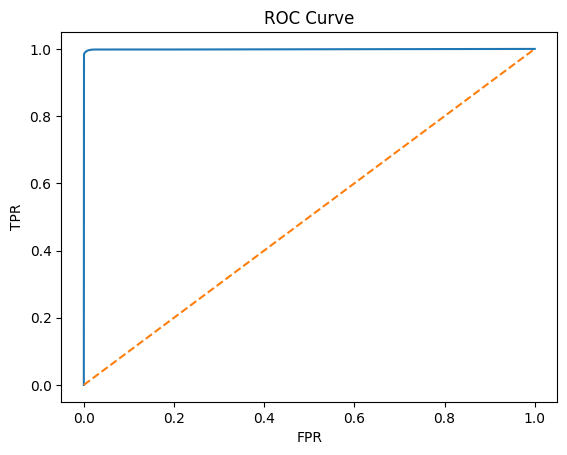

In [113]:
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1], linestyle = '--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.show()

In [114]:
#Se prueba a realizar otro modelo usando modificando la proporcion del target al 10%


In [115]:
from sklearn.model_selection import train_test_split

df_dev_1_X = df_dev_1.drop(['pension_plan'],axis=1)
df_dev_1_y = df_dev_1[['pension_plan']]

# Dividir el dataset en características (X) y target (y)
X = df.drop('pension_plan', axis=1)
y = df['pension_plan']

# Dividir el dataset en conjuntos de entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(df_dev_1_X, df_dev_1_y, test_size=0.2, random_state=42)

# Concatenar características y target en el conjunto de entrenamiento
train_data = pd.concat([X_train, y_train], axis=1)

# Dividir el conjunto de entrenamiento en las clases exitosas y no exitosas
compra = train_data[train_data['pension_plan'] == 1]
no_compra = train_data[train_data['pension_plan'] == 0]



# Realizar un submuestreo estratificado de la clase exitosa
desired_success_rate = 0.1
undersampled_successful_class = compra.sample(frac=desired_success_rate, random_state=42)

# Combinar las clases submuestreadas
undersampled_data = pd.concat([undersampled_successful_class, no_compra])

# Mezclar los datos submuestreados
undersampled_data = undersampled_data.sample(frac=1, random_state=42)

# Obtener las características y el target submuestreados
X_train_undersampled = undersampled_data.drop('pension_plan', axis=1)
y_train_undersampled = undersampled_data['pension_plan']


In [116]:
X_train_undersampled

,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,payroll_account,...,region_code_45.0,region_code_46.0,region_code_47.0,region_code_48.0,region_code_49.0,region_code_50.0,region_code_51.0,region_code_52.0,gender_H,gender_V
2813681,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
5664886,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
4403108,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,True,False,False,True,False
1596841,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
3238277,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1674208,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,True
199866,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,True
300352,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
1807924,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False


In [117]:
y_train_undersampled

2813681    0
5664886    0
4403108    0
1596841    0
3238277    0
          ..
1674208    0
199866     0
300352     0
1807924    0
1389452    0
Name: pension_plan, Length: 3960261, dtype: int32

In [118]:
dt2 = DecisionTreeClassifier(
                          #criterion='gini',
                          #splitter = 'best'
                          max_depth=4, #importante: numero de preguntas, regulará el sobreajuste
                          #min_samples_split=2,
                          #min_samples_leaf=1,
                          #min_weight_fraction_leaf=0.0,
                          #max_features=None,
                          random_state=42,
                          #max_leaf_nodes=None,
                          #min_impurity_decrease=0.0,
                          #min_impurity_split=None,
                          #class_weight=None,
                          #presort=False,


                 )

In [119]:
dt2.fit(
    X=X_train_undersampled,
    y=y_train_undersampled,
    #sample_weight=None,
    #check_input=True,
    #X_idx_sorted=None
)

DecisionTreeClassifier(max_depth=4, random_state=42)

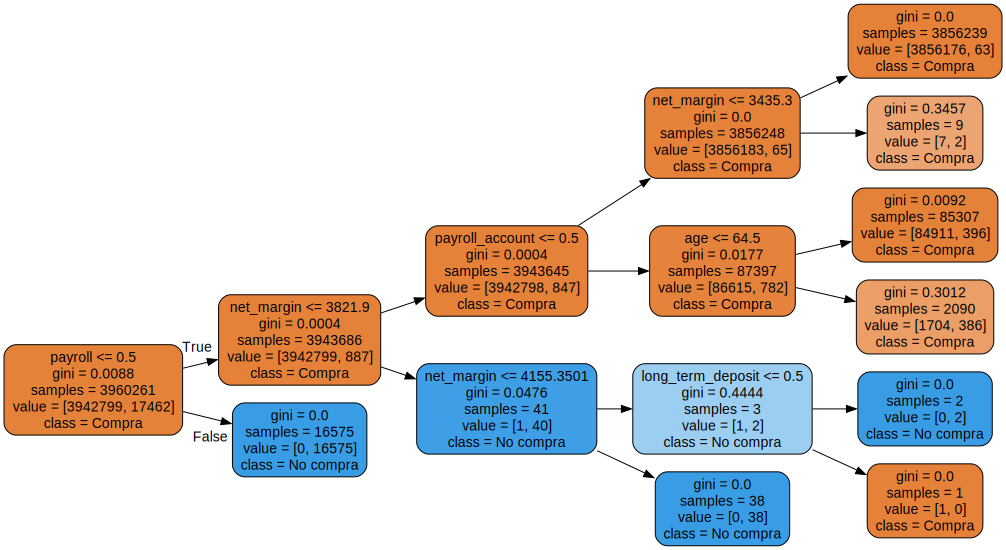

In [120]:
dot_data = export_graphviz(
                          decision_tree = dt2,
                          #out_file=None,
                          #max_depth=None,
                          feature_names=X_test.columns,
                          class_names=['Compra','No compra'],
                          #label=all',
                          filled=True,
                          #leaves_parallel=false,
                          impurity=True,
                          #node_ids=False,
                          proportion=False,
                          rotate=True,
                          rounded=True,
                          special_characters=False,
                          precision=4,
                         )
graph = graphviz.Source(dot_data)
graph

In [121]:
dot_data = dot_data.replace('node [shape=box', 'node [shape=box, width=0.1, height=0.1')

# Crear un objeto graphviz desde el gráfico modificado
graph = graphviz.Source(dot_data)

# Renderizar y mostrar el gráfico del árbol de decisión con las cajas reducidas
graph.render('arbol_decision_reducido', format='png', view=True)

'arbol_decision_reducido.png'

In [122]:
#Revisamos el overfitting (entre train y test). Si medimos con el accuracy, no debería haber más de un punto de 
#diferencia.

for i in range(1,20):
    dt=DecisionTreeClassifier(max_depth=i, random_state=42)
    dt.fit(X_train_undersampled, y_train_undersampled)
    train_accuracy = dt.score(X_train_undersampled, y_train_undersampled)
    test_accuracy = dt.score(X_test, y_test)
    print('Profundidad del árbol: {}. Train: {} - Test: {}'.format(i,train_accuracy,test_accuracy))

Profundidad del árbol: 1. Train: 0.9997760248630078 - Test: 0.997875366491994
Profundidad del árbol: 2. Train: 0.9997858726987944 - Test: 0.9979812581483144
Profundidad del árbol: 3. Train: 0.9997858726987944 - Test: 0.9979812581483144
Profundidad del árbol: 4. Train: 0.9997861252074043 - Test: 0.9979802866652289
Profundidad del árbol: 5. Train: 0.9997873877504538 - Test: 0.9979870870468275
Profundidad del árbol: 6. Train: 0.9997876402590637 - Test: 0.997986115563742
Profundidad del árbol: 7. Train: 0.9997916803968223 - Test: 0.9980074881916231
Profundidad del árbol: 8. Train: 0.9997939529743115 - Test: 0.9980580053120696
Profundidad del árbol: 9. Train: 0.9997992556551197 - Test: 0.9980395471334449
Profundidad del árbol: 10. Train: 0.9998035483014882 - Test: 0.9980473189981289
Profundidad del árbol: 11. Train: 0.9998103660339558 - Test: 0.9980706345921811
Profundidad del árbol: 12. Train: 0.9998209713955721 - Test: 0.998106579466345
Profundidad del árbol: 13. Train: 0.9998262740763804

In [123]:
#OPCION 1: EVALUAMOS A TRAVES DE LOS RESULTADOS

In [124]:
y_test_pred = pd.DataFrame(dt2.predict(X_test),index=y_test.index,columns=['prediccion_compra_plan_pensiones'])

In [125]:
y_test_pred.head()

,prediccion_compra_plan_pensiones
448378,0
201816,1
282213,0
4839900,0
694406,0


In [126]:
results_df=y_test.join(y_test_pred)

In [127]:
results_df.head()

,pension_plan,prediccion_compra_plan_pensiones
448378,0,0
201816,1,1
282213,0,0
4839900,0,0
694406,0,0


In [128]:
results_df['Éxito'] = (results_df['pension_plan']) == results_df['prediccion_compra_plan_pensiones'].astype(int)

In [129]:
results_df.head()

,pension_plan,prediccion_compra_plan_pensiones,Éxito
448378,0,0,True
201816,1,1,True
282213,0,0,True
4839900,0,0,True
694406,0,0,True


In [130]:
results_df['Éxito'].count()

1029354

In [131]:
results_df['Éxito'].sum()

1027275

In [132]:
results_df['Éxito'].mean()

0.9979802866652289

In [133]:
confusion_matrix = pd.crosstab(results_df['pension_plan'],results_df['prediccion_compra_plan_pensiones'])

In [134]:
confusion_matrix

prediccion_compra_plan_pensiones,0,1
pension_plan,,
0,985864,0
1,2079,41411


In [135]:
#La distribución del target es (que ya lo vimos al principio):
results_df['pension_plan'].mean()

0.04224979938874284

In [136]:
metrics.accuracy_score(results_df['pension_plan'],results_df['prediccion_compra_plan_pensiones'])

0.9979802866652289

In [137]:
y_score = pd.DataFrame(dt.predict_proba(X_test)[:,1], index = y_test.index, columns = ['Compra_Score'])

In [138]:
results_df = results_df.join(y_score)

In [139]:
results_df.head(10)

,pension_plan,prediccion_compra_plan_pensiones,Éxito,Compra_Score
448378,0,0,True,0.000000
201816,1,1,True,1.000000
282213,0,0,True,0.000000
4839900,0,0,True,0.000000
694406,0,0,True,0.000000
809984,0,0,True,0.000000
909813,0,0,True,0.000000
5863863,0,0,True,0.000000
2812129,0,0,True,0.000000
4555422,0,0,True,0.002005


In [140]:
TP = confusion_matrix.iloc[1,1]
TN = confusion_matrix.iloc[0,0]
FP = confusion_matrix.iloc[0,1]
FN = confusion_matrix.iloc[1,0]

In [141]:
Precision = TP/(TP+FP)
Recall = TP/(TP+FN)

In [142]:
f1_score = 2 / (1/Precision + 1/Recall)

In [143]:
f1_score

0.9755126559168914

In [144]:
Precision

1.0

In [145]:
Recall

0.9521959071050816

In [146]:
metrics.f1_score(y_test, y_test_pred)

0.9755126559168914

In [147]:
#AUC

metrics.roc_auc_score(results_df['pension_plan'], results_df['Compra_Score'])

0.9923733044956758

In [148]:
#ROC Curve

fpr, tpr, th = metrics.roc_curve(results_df['pension_plan'], results_df['Compra_Score'])

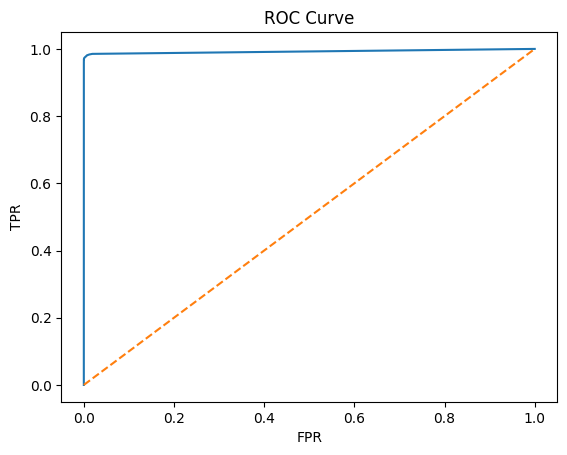

In [221]:
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1], linestyle = '--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.show()